In [45]:
import pandas as pd
dailyActivity= 'C:/Users/Lenovo/Downloads/fitbit dataset/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv'
df = pd.read_csv(dailyActivity)
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [2]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

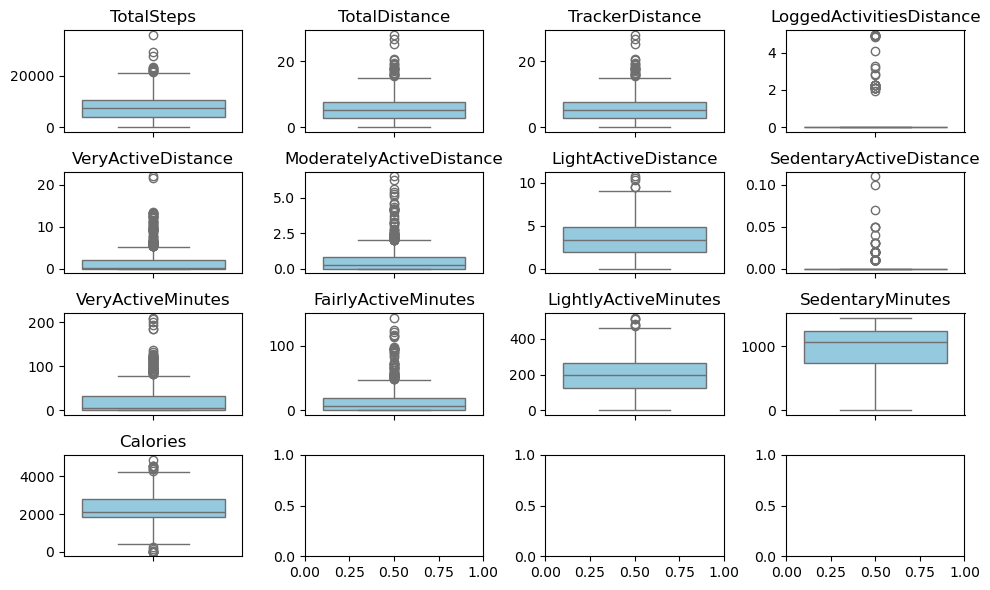

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = [
    'TotalSteps', 'TotalDistance', 'TrackerDistance',
    'LoggedActivitiesDistance', 'VeryActiveDistance',
    'ModeratelyActiveDistance', 'LightActiveDistance',
    'SedentaryActiveDistance', 'VeryActiveMinutes',
    'FairlyActiveMinutes', 'LightlyActiveMinutes',
    'SedentaryMinutes', 'Calories'
]

# Create a 4x3 subplot
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 6))
axes = axes.flatten()  

for ax, column in zip(axes, columns):
    sns.boxplot(data=df, y=column, ax=ax, color='skyblue')
    ax.set_title(column)
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

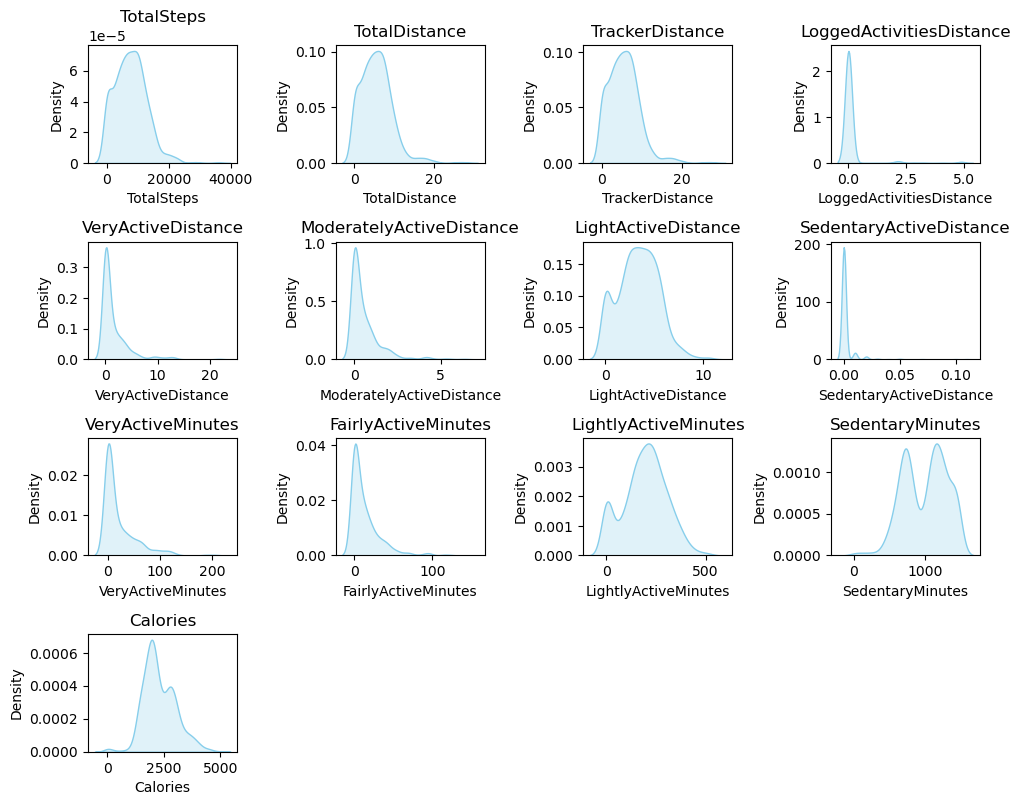

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 8))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate

# Create a KDE plot for each column
for ax, column in zip(axes, columns):
    sns.kdeplot(data=df, x=column, ax=ax, fill=True, color='skyblue')
    ax.set_title(column)
    ax.set_ylabel('Density')

# Remove any empty subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Activity Ratios

## ActiveDistanceRatio

In [46]:
df['ActiveDistanceRatio'] = (
    df['VeryActiveDistance'] + 
    df['ModeratelyActiveDistance'] + 
    df['LightActiveDistance']
) / df['TotalDistance']
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveDistanceRatio
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0.998824
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1.000000
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1.001484
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,0.992038
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1.000000


## Proportion of Active Minutes

In [47]:
df['ActiveMinutesRatio'] = (
    df['VeryActiveMinutes'] + 
    df['FairlyActiveMinutes'] + 
    df['LightlyActiveMinutes']
) / (
    df['VeryActiveMinutes'] + 
    df['FairlyActiveMinutes'] + 
    df['LightlyActiveMinutes'] + 
    df['SedentaryMinutes']
)


In [21]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveDistanceRatio,ActiveMinutesRatio
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0.998824,0.334552
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1.000000,0.248790
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1.001484,0.154167
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,0.992038,0.272545
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1.000000,0.256731


## cek NaN

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [48]:
df['ActiveDistanceRatio'] = df['ActiveDistanceRatio'].fillna(0.0)
df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
ActiveDistanceRatio         0
ActiveMinutesRatio          0
dtype: int64

In [52]:
df.shape

(940, 17)

# Handling Outlier (using IQR)

In [49]:
columns_new = [
    'TotalSteps', 'TotalDistance', 'TrackerDistance',
    'LoggedActivitiesDistance', 'VeryActiveDistance',
    'ModeratelyActiveDistance', 'LightActiveDistance',
    'SedentaryActiveDistance', 'VeryActiveMinutes',
    'FairlyActiveMinutes', 'LightlyActiveMinutes',
    'SedentaryMinutes', 'ActiveDistanceRatio', 'ActiveMinutesRatio']

In [51]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, features):
    df_clean = df.copy()
    for feature in features:
        Q1 = df_clean[feature].quantile(0.25)
        Q3 = df_clean[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter data within the bounds
        df_clean = df_clean[(df_clean[feature] >= lower_bound) & (df_clean[feature] <= upper_bound)]
    return df_clean

# List of columns to check for outliers
columns_new = [
    'TotalSteps', 'TotalDistance', 'TrackerDistance',
    'LoggedActivitiesDistance', 'VeryActiveDistance',
    'ModeratelyActiveDistance', 'LightActiveDistance',
    'SedentaryActiveDistance', 'VeryActiveMinutes',
    'FairlyActiveMinutes', 'LightlyActiveMinutes',
    'SedentaryMinutes', 'ActiveDistanceRatio', 'ActiveMinutesRatio'
]

# Remove outliers using IQR method
df_no_outliers = remove_outliers_iqr(df, columns_new)

# Check the resulting DataFrame
print(df_no_outliers.shape)


(472, 17)


## kdeplot after outlier removed

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11732\1915564088.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_no_outliers, x=column, ax=ax, fill=True, color='skyblue')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11732\1915564088.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_no_outliers, x=column, ax=ax, fill=True, color='skyblue')


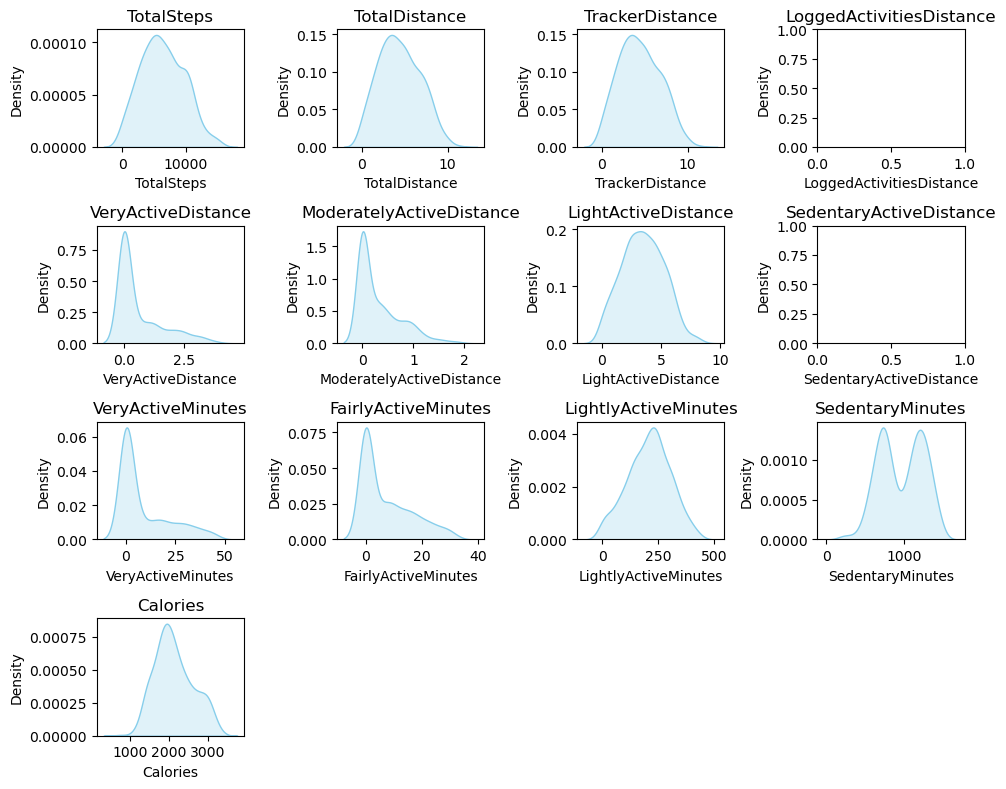

In [63]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 8))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate

# Create a KDE plot for each column
for ax, column in zip(axes, columns):
    sns.kdeplot(data=df_no_outliers, x=column, ax=ax, fill=True, color='skyblue')
    ax.set_title(column)
    ax.set_ylabel('Density')

# Remove any empty subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Feature Standardization

## Standard Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
df_logstd = df_no_outliers.copy()
for num in columns_new:
    df_logstd[num] = StandardScaler().fit_transform(df_logstd[num].values.reshape(len(df_logstd),1))
df_logstd.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveDistanceRatio,ActiveMinutesRatio
count,4.720000e+02,4.720000e+02,4.720000e+02,4.720000e+02,472.0,4.720000e+02,472.000000,4.720000e+02,472.0,4.720000e+02,4.720000e+02,4.720000e+02,4.720000e+02,472.000000,4.720000e+02,4.720000e+02
mean,4.416863e+09,-8.655976e-17,-6.021549e-17,-6.021549e-17,0.0,1.354848e-16,0.000000,2.483889e-16,0.0,-3.763468e-18,4.516161e-17,6.021549e-17,-9.785016e-17,2124.154661,-3.754436e-14,-1.505387e-16
std,2.287683e+09,1.001061e+00,1.001061e+00,1.001061e+00,0.0,1.001061e+00,1.001061,1.001061e+00,0.0,1.001061e+00,1.001061e+00,1.001061e+00,1.001061e+00,495.336960,1.001061e+00,1.001061e+00
min,1.503960e+09,-1.876098e+00,-1.846904e+00,-1.846904e+00,0.0,-6.560788e-01,-0.759242,-1.944196e+00,0.0,-6.855848e-01,-8.096637e-01,-2.204739e+00,-2.651104e+00,741.000000,-4.452823e+00,-2.110108e+00
25%,2.026352e+09,-7.625015e-01,-7.631026e-01,-7.631026e-01,0.0,-6.560788e-01,-0.759242,-7.064817e-01,0.0,-6.855848e-01,-8.096637e-01,-6.717404e-01,-8.530597e-01,1776.000000,3.532554e-01,-6.893415e-01
50%,4.416638e+09,-7.092752e-02,-7.111274e-02,-7.111274e-02,0.0,-6.560788e-01,-0.591750,-5.675578e-03,0.0,-6.855848e-01,-5.872830e-01,6.143292e-02,8.477889e-02,2050.000000,3.532761e-01,6.798254e-02
75%,6.117666e+09,7.664401e-01,7.788657e-01,7.788657e-01,0.0,4.638536e-01,0.532843,7.134984e-01,0.0,5.578197e-01,6.358110e-01,6.852967e-01,8.762754e-01,2470.750000,3.532761e-01,6.292407e-01
max,8.877689e+09,2.611231e+00,2.951735e+00,2.951735e+00,0.0,3.413535e+00,3.763058,2.718426e+00,0.0,2.811491e+00,2.748428e+00,2.391591e+00,1.707034e+00,3328.000000,2.030616e+00,2.752435e+00


### boxplot after standard scaling

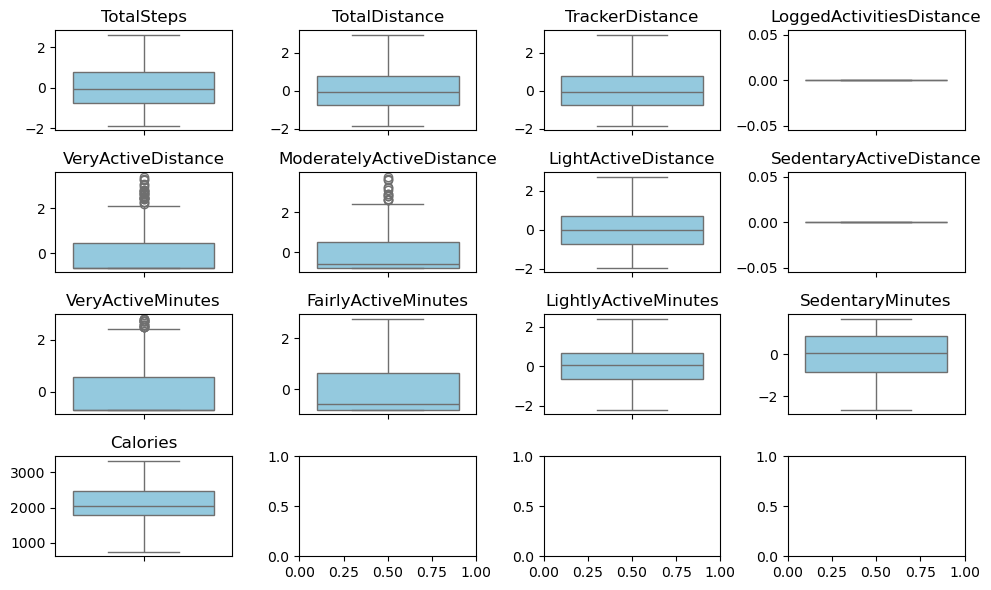

In [57]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 6))
axes = axes.flatten()  

for ax, column in zip(axes, columns):
    sns.boxplot(data=df_logstd, y=column, ax=ax, color='skyblue')
    ax.set_title(column)
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

### kdeplot after standard scaling

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11732\3274621945.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_logstd, x=column, ax=ax, fill=True, color='skyblue')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11732\3274621945.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_logstd, x=column, ax=ax, fill=True, color='skyblue')


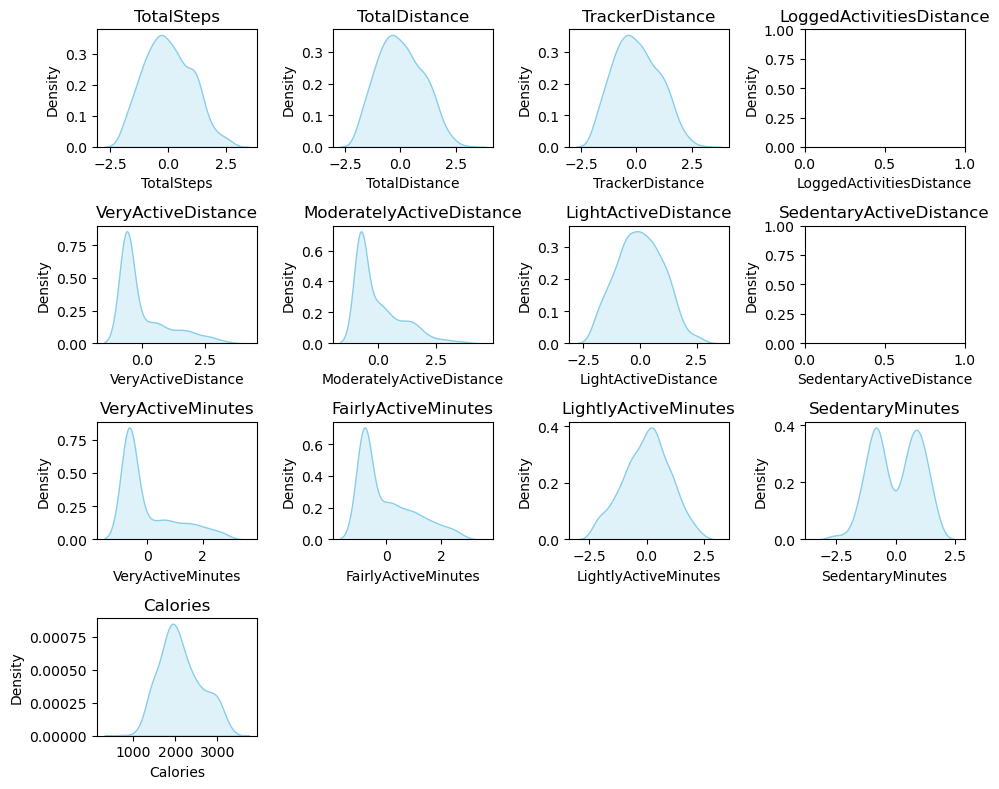

In [58]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 8))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate

# Create a KDE plot for each column
for ax, column in zip(axes, columns):
    sns.kdeplot(data=df_logstd, x=column, ax=ax, fill=True, color='skyblue')
    ax.set_title(column)
    ax.set_ylabel('Density')

# Remove any empty subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## MinMax Scaler

In [60]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df_minmax = df_no_outliers.copy()
for num in columns_new:
    df_minmax[num] = MinMaxScaler().fit_transform(df_minmax[num].values.reshape(len(df_minmax),1))
df_minmax.describe()


,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveDistanceRatio,ActiveMinutesRatio
count,4.720000e+02,472.000000,472.000000,472.000000,472.0,472.000000,472.000000,472.000000,472.0,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,4.416863e+09,0.418088,0.384881,0.384881,0.0,0.161214,0.167889,0.416975,0.0,0.196045,0.227556,0.479674,0.608311,2124.154661,0.686800,0.433952
std,2.287683e+09,0.223086,0.208614,0.208614,0.0,0.245984,0.221361,0.214699,0.0,0.286257,0.281348,0.217796,0.229699,495.336960,0.154403,0.205872
min,1.503960e+09,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,741.000000,0.000000,0.000000
25%,2.026352e+09,0.248165,0.225856,0.225856,0.0,0.000000,0.000000,0.265455,0.0,0.000000,0.000000,0.333527,0.412572,1776.000000,0.741285,0.292186
50%,4.416638e+09,0.402282,0.370061,0.370061,0.0,0.000000,0.037037,0.415758,0.0,0.000000,0.062500,0.493039,0.627764,2050.000000,0.741289,0.447932
75%,6.117666e+09,0.588889,0.547191,0.547191,0.0,0.275194,0.285714,0.570000,0.0,0.355556,0.406250,0.628770,0.809378,2470.750000,0.741289,0.563357
max,8.877689e+09,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,3328.000000,1.000000,1.000000


### boxplot after minmax scaling

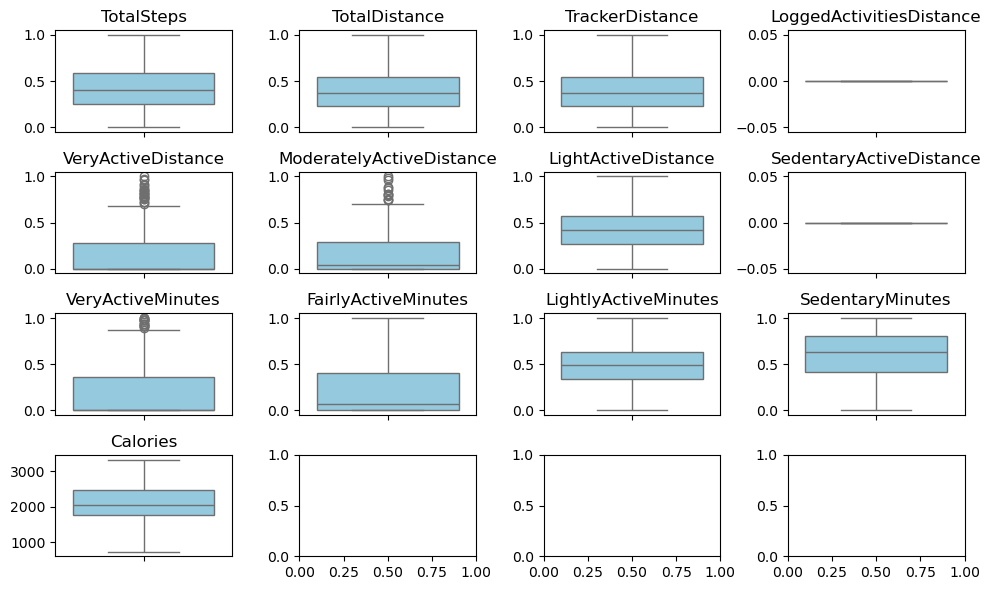

In [61]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 6))
axes = axes.flatten()  

for ax, column in zip(axes, columns):
    sns.boxplot(data=df_minmax, y=column, ax=ax, color='skyblue')
    ax.set_title(column)
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

### kdeplot after MinMax scaling

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11732\1328834079.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_minmax, x=column, ax=ax, fill=True, color='skyblue')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11732\1328834079.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_minmax, x=column, ax=ax, fill=True, color='skyblue')


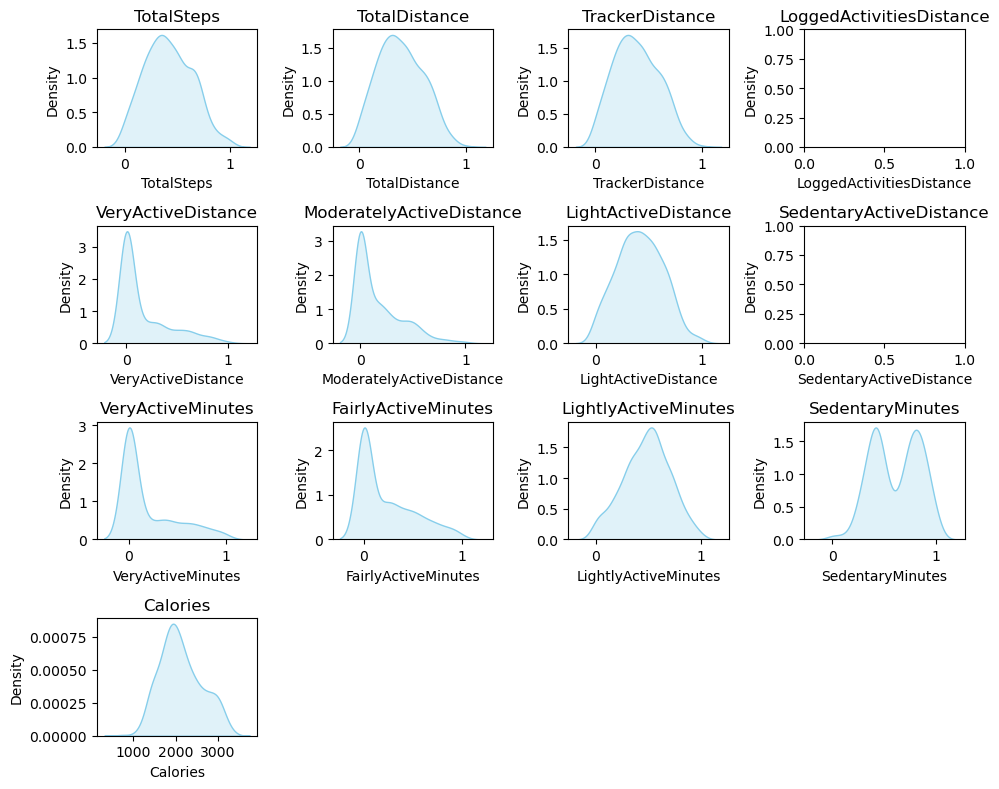

In [62]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 8))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate

# Create a KDE plot for each column
for ax, column in zip(axes, columns):
    sns.kdeplot(data=df_minmax, x=column, ax=ax, fill=True, color='skyblue')
    ax.set_title(column)
    ax.set_ylabel('Density')

# Remove any empty subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveDistanceRatio,ActiveMinutesRatio
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,862.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,0.984579,0.200163
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,0.107942,0.117836
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,0.998317,0.123964
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1.000000,0.214142
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1.000000,0.269510
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1.007092,1.000000


# Best Feature

## bingung krn masih error

In [20]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
columns = [
    'TotalSteps', 'TotalDistance', 'TrackerDistance',
    'LoggedActivitiesDistance', 'VeryActiveDistance',
    'ModeratelyActiveDistance', 'LightActiveDistance',
    'SedentaryActiveDistance', 'VeryActiveMinutes',
    'FairlyActiveMinutes', 'LightlyActiveMinutes',
    'SedentaryMinutes', 'ActiveDistanceRatio', 'ActiveMinutesRatio']
# Define features and target
X = df.drop(columns=['Calories', 'ActivityDate', 'Id'])  # Ensure df is a DataFrame
y = df['Calories']

# Initialize SelectKBest with f_regression and select all features
selector = SelectKBest(f_regression, k=X.shape[1])  # Use X.shape[1] to select all features

# Fit the model and transform X
X_new = selector.fit_transform(X, y)

# Get the mask of selected features
selected_features = selector.get_support()

# Get the names of the selected features
feature_names = X.columns[selected_features]

# Get the scores for each feature
feature_scores = selector.scores_

# Create pairs of feature names and their corresponding scores
feature_score_pairs = list(zip(X.columns, feature_scores))

# Sort features by their scores in descending order
sorted_features = sorted(feature_score_pairs, key=lambda x: x[1], reverse=True)

# Create a DataFrame to display sorted features and their scores
sorted_features_df = pd.DataFrame(sorted_features, columns=['Feature', 'Score'])

# Display the DataFrame
sorted_features_df


KeyError: 'Calories'

# Conclution

- fitur logged avtivity distance dan sedentary activity distance sebaiknya tidak diremove outlier
- standarisasi mengunakan standard maupun minmax scale tidak memberikan perubahan signifikan pada bentuk kurva distribusi data
